# Imports

In [2]:
import sys # system commands
import os # os.path module for working with file paths/directories

import numpy as np # numeric arrays
import pandas as pd # spreadsheet data
pd.options.display.max_rows = 100
pd.options.display.max_columns = 999
import scipy.stats as stats # statistical tests
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.rcParams["pdf.fonttype"] = 42


# Setup data

## Steps to produce Plot 1 (Histogram)
### x axis = number of words recalled (0,1,2,3)
### y axis = percent of subjects
1. load cvlt spreadsheet into dataframe
1. subset only cued recall rows
1. subset categories
1. count number of recognized words per subject
1. create histogram


### Import spreadsheets into dataframe

In [3]:
print(os.path.exists(os.path.join(os.path.expanduser("~"), "Box")))
#os.chdir("c:\Users\cyballa\Box\")

True


In [4]:
proj_dir = os.path.join(os.path.expanduser("~"), "Box", "CVLT_analyses_Chinese")
infile = os.path.join(proj_dir, "cvlt-responses-formatted_131-subjects_2023-11-20.csv")
dat = pd.read_csv(infile)

### Check name of tasks

In [5]:
# 
dat["task"].value_counts(dropna=True)

# write a function that subsets dat into dat_cued,
# which only has rows where trial == "cued_*"


task
free_recall    7390
recognition    3537
cued_recall    1243
Name: count, dtype: int64

### Subset only cued recall rows & separate by category

In [6]:
# subset cued recall
dat_cued = dat[dat["task"] == "cued_recall"]

## Save csv to file path

In [7]:
print(os.path.exists(os.path.join(os.path.expanduser("~"), "Documents")))

True


In [8]:
proj_local = os.path.join(os.path.expanduser("~"), "Documents", "code", "projects", "cvlt")

In [10]:
dat_cued_group = (
    dat_cued
    .query("field=='study_item'")
    .groupby(["subj", "trial"])
    ["rec"].sum()
).reset_index()
dat_cued_group.head()
dat_cued_group.to_csv()

',subj,trial,rec\r\n0,4670,cued_clothing,3\r\n1,4670,cued_fruit,0\r\n2,4670,cued_vehicles,2\r\n3,5380,cued_clothing,1\r\n4,5380,cued_fruit,2\r\n5,5380,cued_vehicles,0\r\n6,5451,cued_clothing,3\r\n7,5451,cued_fruit,3\r\n8,5451,cued_vehicles,3\r\n9,5844,cued_clothing,1\r\n10,5844,cued_fruit,3\r\n11,5844,cued_vehicles,1\r\n12,6760,cued_clothing,3\r\n13,6760,cued_fruit,3\r\n14,6760,cued_vehicles,3\r\n15,8180,cued_clothing,3\r\n16,8180,cued_fruit,3\r\n17,8180,cued_vehicles,3\r\n18,8247,cued_clothing,3\r\n19,8247,cued_fruit,3\r\n20,8247,cued_vehicles,3\r\n21,8280,cued_clothing,3\r\n22,8280,cued_fruit,3\r\n23,8280,cued_vehicles,3\r\n24,8420,cued_clothing,3\r\n25,8420,cued_fruit,3\r\n26,8420,cued_vehicles,3\r\n27,8421,cued_clothing,3\r\n28,8421,cued_fruit,3\r\n29,8421,cued_vehicles,3\r\n30,8422,cued_clothing,3\r\n31,8422,cued_fruit,3\r\n32,8422,cued_vehicles,3\r\n33,8435,cued_clothing,1\r\n34,8435,cued_fruit,1\r\n35,8435,cued_vehicles,3\r\n36,8495,cued_clothing,3\r\n37,8495,cued_fruit,3\r\n38,

### Subset of categories

In [11]:
dat_cued_fruit = dat_cued_group[dat_cued_group["trial"] == "cued_fruit"]# cued fruit only
dat_cued_clothing = dat_cued_group[dat_cued_group["trial"] == "cued_clothing"]  # cued clothing only
dat_cued_vehicles = dat_cued_group[dat_cued_group["trial"] == "cued_vehicles"]  # cued vehicles only

# Create plots

## Bar Graph
### Fruit

In [27]:
dat_cued_fruit["rec"].value_counts(dropna=True)

rec
3    82
2    27
1    15
0     7
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of fruit words recalled')

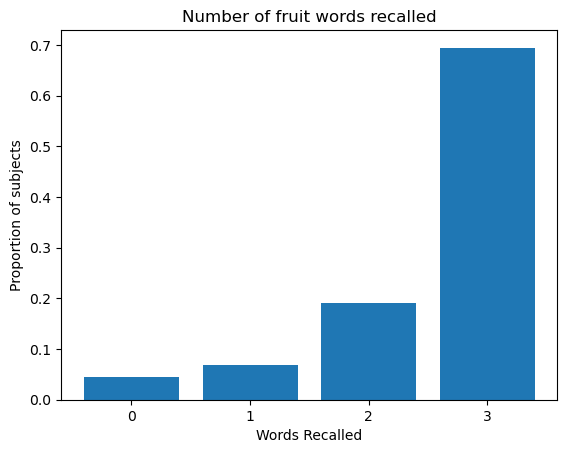

In [46]:
counts_fruit = ['0', '1', '2', '3']
subjects_fruit = [0.0534, .1145, .2061, .6256]  #number of subjects who recalled 0,1,2,3 words ]
count_label = ['0', '1', '2', '3']
    
fig, cued_fruit = plt.subplots()

cued_fruit.bar(counts_fruit, subjects_fruit, label=count_label)
cued_fruit.set_xlabel('Words Recalled')
cued_fruit.set_ylabel('Proportion of subjects')
cued_fruit.set_title('Number of fruit words recalled')

### Clothing

In [35]:
dat_cued_clothing["trial"].value_counts(dropna=True)

trial
cued_clothing    131
Name: count, dtype: int64

In [34]:
dat_cued_clothing["rec"].value_counts(dropna=True)

rec
3    66
2    32
1    21
0    12
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of clothing words recalled')

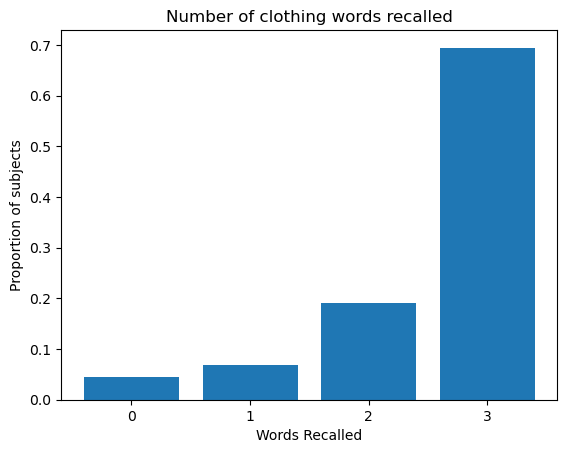

In [47]:
counts_clothing = ['0', '1', '2', '3']
subjects_clothing = [0.0916, .1603, .2443, .5038] 
count_label = ['0', '1', '2', '3']

fig, cued_clothing = plt.subplots()

cued_clothing.bar(counts_clothing, subjects_clothing, label=count_label)
cued_clothing.set_xlabel('Words Recalled')
cued_clothing.set_ylabel('Proportion of subjects')
cued_clothing.set_title('Number of clothing words recalled')

### Vehicles

In [40]:
dat_cued_vehicles["trial"].value_counts(dropna=True)

trial
cued_vehicles    131
Name: count, dtype: int64

In [41]:
dat_cued_vehicles["rec"].value_counts(dropna=True)

rec
3    91
2    25
0     9
1     6
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of vehicle words recalled')

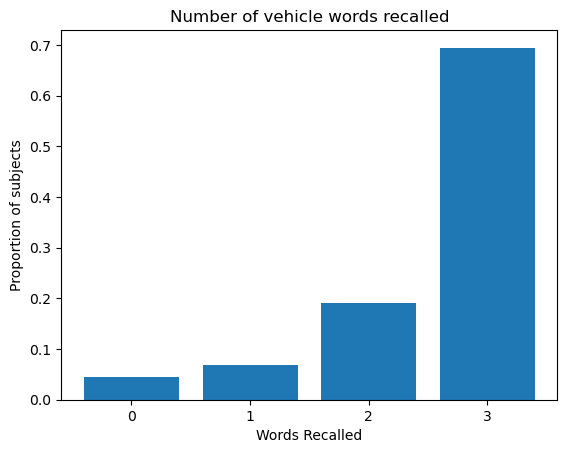

In [48]:
counts_vehicles = ['0', '1', '2', '3']
subjects_vehicles = [0.0458, .0687, .1908, .6947] 
count_label = ['0', '1', '2', '3']

fig, cued_vehicles = plt.subplots()

cued_vehicles.bar(counts_vehicles, subjects_vehicles, label=count_label)
cued_vehicles.set_xlabel('Words Recalled')
cued_vehicles.set_ylabel('Proportion of subjects')
cued_vehicles.set_title('Number of vehicle words recalled')

# Stacked Subplot

(0.0, 0.75)

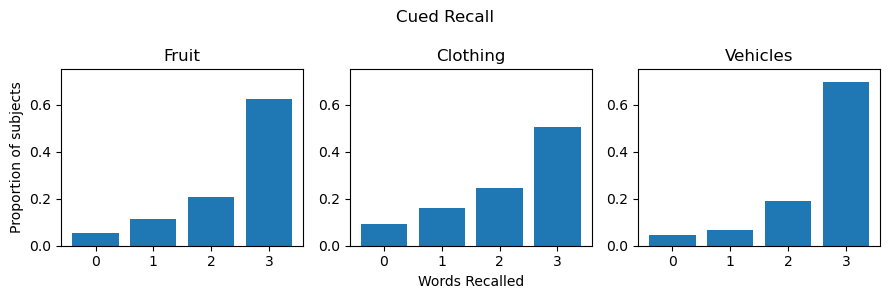

In [77]:
fig, (cued_fruit, cued_clothing, cued_vehicles) = plt.subplots(1,3, figsize=(9, 3), tight_layout=True)
fig.suptitle('Cued Recall')

cued_fruit.bar(counts_fruit, subjects_fruit, label=count_label)
cued_fruit.set_ylabel('Proportion of subjects')
cued_fruit.set_title('Fruit')
cued_fruit.set_ylim(0, 0.75)

cued_clothing.bar(counts_clothing, subjects_clothing, label=count_label)
cued_clothing.set_xlabel('Words Recalled')
cued_clothing.set_title('Clothing')
cued_clothing.set_ylim(0, 0.75)

cued_vehicles.bar(counts_vehicles, subjects_vehicles, label=count_label)
cued_vehicles.set_title('Vehicles')
cued_vehicles.set_ylim(0, 0.75)